In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/cleaned_encoded.csv"
df=pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
print(df.min())
print(df.max())


Location                    0.067132
MinimumTemperature         -5.950000
MaximumTemperature          2.700000
Rainfall                    0.000000
Evaporation                 2.022000
Sunshine                    5.977944
WindGustSpeed               8.500000
WindSpeed9am                0.000000
WindSpeed3pm                0.000000
Humidity9am                18.000000
Humidity3pm                 0.000000
Pressure9am              1001.050000
Pressure3pm               998.650000
Cloud9am                    0.000000
Cloud3pm                    1.000000
Temperature9am             -1.500000
Temperature3pm              2.450000
CloudBurst Today            0.000000
CloudBurstTomorrow          0.000000
Year                     2007.000000
Month                       1.000000
Day                         1.000000
WindGustDirection_sin      -1.000000
WindGustDirection_cos      -1.000000
WindDirection9am_sin       -1.000000
WindDirection9am_cos       -1.000000
WindDirection3pm_sin       -1.000000
W

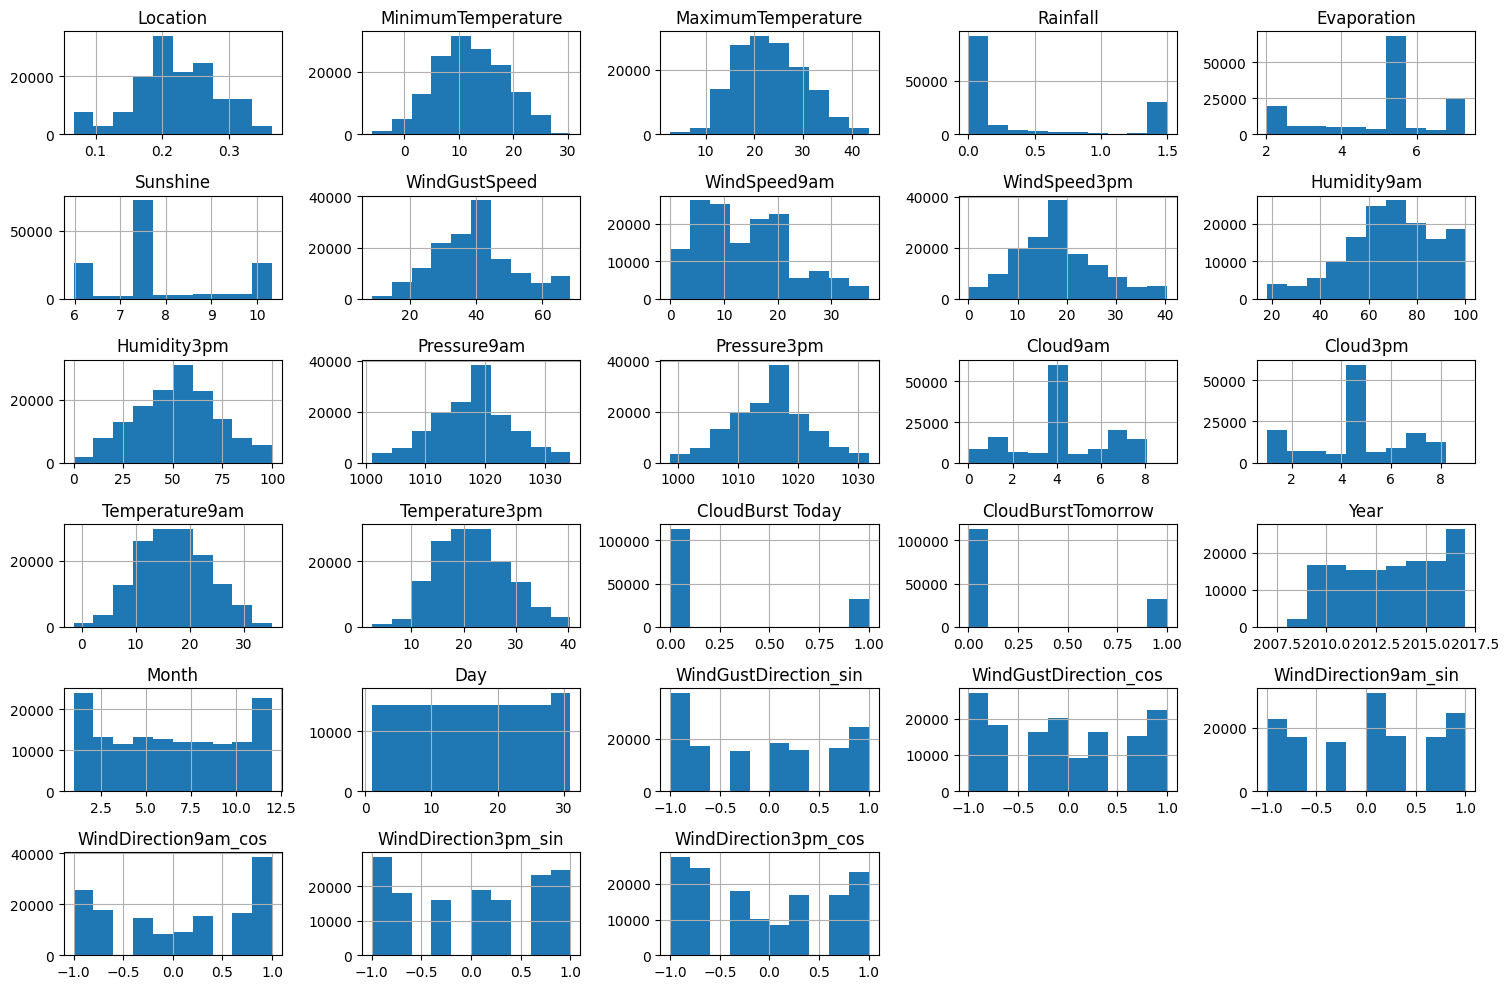

In [3]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [4]:
print(df.mean())
print(df.std())


Location                    0.219146
MinimumTemperature         12.194318
MaximumTemperature         23.225174
Rainfall                    0.392597
Evaporation                 5.000822
Sunshine                    7.922535
WindGustSpeed              39.702391
WindSpeed9am               13.951313
WindSpeed3pm               18.574162
Humidity9am                68.933565
Humidity3pm                51.539116
Pressure9am              1017.678987
Pressure3pm              1015.275746
Cloud9am                    4.447461
Cloud3pm                    4.544125
Temperature9am             16.991751
Temperature3pm             21.685738
CloudBurst Today            0.219167
CloudBurstTomorrow          0.219146
Year                     2012.769751
Month                       6.399615
Day                        15.712258
WindGustDirection_sin      -0.089295
WindGustDirection_cos      -0.044828
WindDirection9am_sin        0.014822
WindDirection9am_cos        0.085493
WindDirection3pm_sin        0.001829
W

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Drop target column before scaling
X = df.drop(['CloudBurstTomorrow'], axis=1)
y = df['CloudBurstTomorrow']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
# Features and Target
X = df.drop(['CloudBurstTomorrow'], axis=1)
y = df['CloudBurstTomorrow']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1)


Epoch 1/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8204 - loss: 0.4039 - val_accuracy: 0.8296 - val_loss: 0.3814
Epoch 2/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8412 - loss: 0.3631 - val_accuracy: 0.8459 - val_loss: 0.3562
Epoch 3/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8451 - loss: 0.3534 - val_accuracy: 0.8464 - val_loss: 0.3569
Epoch 4/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8488 - loss: 0.3475 - val_accuracy: 0.8470 - val_loss: 0.3537
Epoch 5/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8519 - loss: 0.3443 - val_accuracy: 0.8479 - val_loss: 0.3514
Epoch 6/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8491 - loss: 0.3471 - val_accuracy: 0.8465 - val_loss: 0.3590
Epoch 7/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8512 - loss: 0.3448 - val_accuracy: 0.8470 - val_loss: 0.3530
Epoch 8/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8512 - loss: 0.344

In [11]:
# Accuracy on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict and report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes))


910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8485 - loss: 0.3451
Test Accuracy: 0.8507
910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.74      0.50      0.59      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



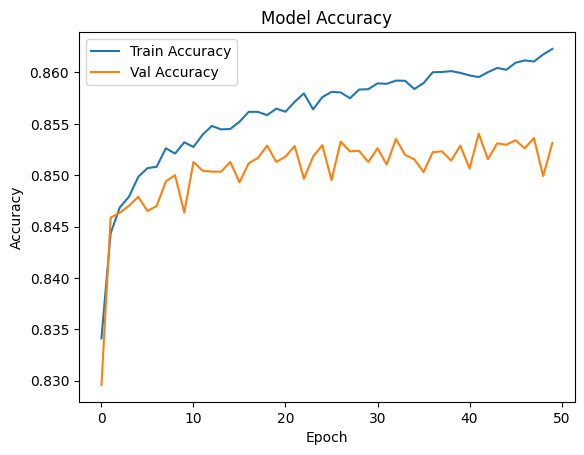

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


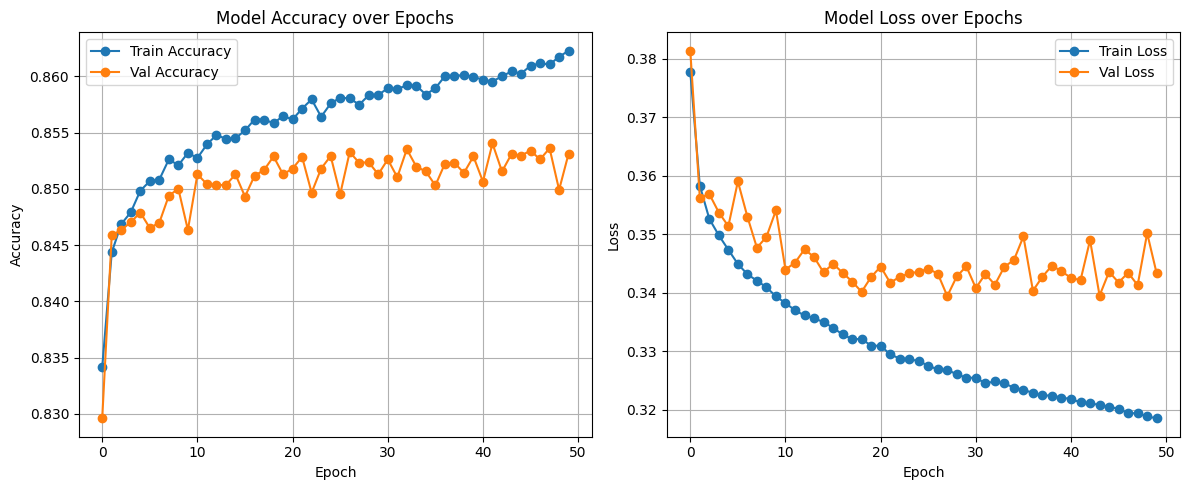

In [13]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
#overfitting

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

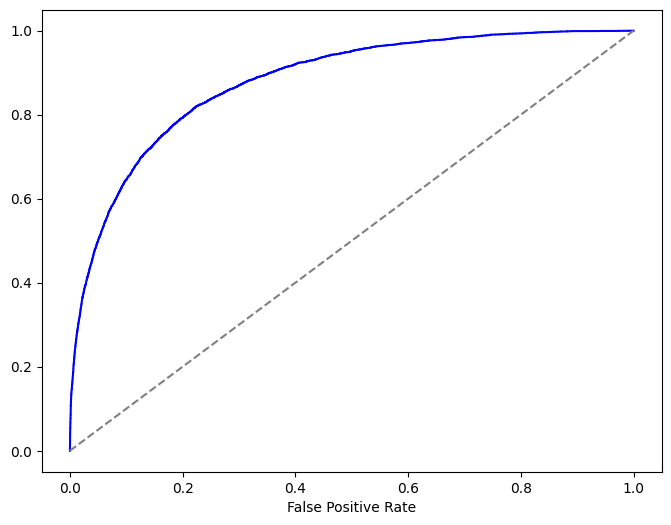

In [16]:
#ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel


910/910 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22672
           1       0.74      0.50      0.59      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



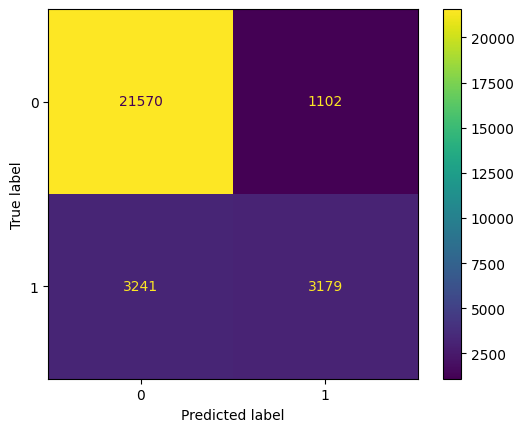

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [19]:
# Count values of each class
print(df['CloudBurstTomorrow'].value_counts())

# Or use percentages for better clarity
print(df['CloudBurstTomorrow'].value_counts(normalize=True) * 100)


CloudBurstTomorrow
0    113583
1     31877
Name: count, dtype: int64
CloudBurstTomorrow
0    78.085384
1    21.914616
Name: proportion, dtype: float64
